In [1]:
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#estimators

from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC
#from sklearn import linear_model

#model metrics
#from sklearn import metrics
from sklearn.metrics import accuracy_score

#cross validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score



In [2]:
from sklearn import preprocessing

In [3]:
#data
rawData = pd.read_csv(r'C:\Users\Brad Lingenfelder\OneDrive - Indigo Beam\UT_DataAnalytics\Course 5\credit_default_notprocessed.csv', header=1)
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [75]:
#features
#features = rawData.iloc[:,1:6]
features = rawData.iloc[:,1:12]
print('Summary of feature sample')
features.head()

Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,20000,2,2,1,24,2,2,-1,-1,-2,-2
1,120000,2,2,2,26,-1,2,0,0,0,2
2,90000,2,2,2,34,0,0,0,0,0,0
3,50000,2,2,1,37,0,0,0,0,0,0
4,50000,1,2,1,57,-1,0,-1,0,0,0


In [76]:
#dependent variable
depVar = rawData['DEFAULT']

In [77]:
#Training Set (Feature Space: X Training)
X_train = (features[: 1000])
#X_train.head()

In [78]:
#Dependent Variable Training Set (y Training)
y_train = depVar[: 1000]
y_train_count = len(y_train.index)
#print('The number of observations in the Y training set are:',str(y_train_count))
#y_train.head()

In [79]:
#Testing Set (X Testing)
X_test = features[-100:]
X_test_count = len(X_test.index)
#print('The number of observations in the feature testing set is:',str(X_test_count))
#print(X_test.head())

In [80]:
#Ground Truth (y_test) 
y_test = depVar[-100:]
y_test_count = len(y_test.index)
#print('The number of observations in the Y training set are:',str(y_test_count))
#y_test.head()

In [81]:
#implement cross validation
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

In [82]:
X_train.shape, X_test.shape

((750, 11), (250, 11))

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape

((562, 11), (188, 11))

In [ ]:
#from sklearn.decomposition import PCA
#pca=PCA(n_components=2)
#pca.fit(X_train,y_train)

In [ ]:
#Model Fitting PCA
#pca.fit(X_train,y_train)
#print(cross_val_score(pca, X_train, y_train))
#pca.score(X_train,y_train)

In [84]:
#Models

#ModelRF = RandomForestClassifier(max_depth=5, max_features="sqrt", n_jobs=-1, n_estimators=1000)
ModelRF = RandomForestClassifier(max_depth=5, n_jobs=-1, n_estimators=1000, min_samples_leaf=2)
ModelSVC = SVC(kernel="poly", degree=3)
#ModelSVC = SVC(kernel="linear")
ModelKNN = KNeighborsClassifier(n_neighbors=100, n_jobs=-1, algorithm="kd_tree")

In [65]:
#dependent variable
print(depVar)

0        1
1        1
2        0
3        0
4        0
        ..
29473    0
29474    0
29475    1
29476    1
29477    1
Name: DEFAULT, Length: 29478, dtype: int64


In [85]:
ModelRF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [87]:
ModelSVC.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [88]:
ModelKNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=100, p=2,
                     weights='uniform')

In [ ]:
print(cross_val_score(ModelRF, X_train, y_train)) 

In [91]:
#Model Fitting RANDOM FOREST
ModelRF.fit(X_train,y_train)
print(cross_val_score(ModelRF, X_train, y_train))
ModelRF.score(X_train,y_train)

[0.80530973 0.75221239 0.79464286 0.77678571 0.80357143]


0.8647686832740213

In [89]:
#Model Fitting KNN
ModelKNN.fit(X_train,y_train)
print(cross_val_score(ModelKNN, X_train, y_train))
ModelKNN.score(X_train,y_train)

[0.77876106 0.77876106 0.78571429 0.77678571 0.77678571]


0.7793594306049823

In [90]:
#Model Fitting SVC
ModelSVC.fit(X_train,y_train)
print(cross_val_score(ModelSVC, X_train, y_train))
ModelSVC.score(X_train,y_train)

[0.77876106 0.77876106 0.78571429 0.77678571 0.77678571]


0.7793594306049823

In [92]:
#Make Predictions with Random Forest Model
RFpredictions = ModelRF.predict(X_test)
RFpredAccuracy = accuracy_score(y_test,RFpredictions)

print('Random Forest Accuracy: %.3f' % RFpredAccuracy)


Random Forest Accuracy: 0.840


In [101]:
#Make Predictions with Knn Model
KNNpredictions = ModelKNN.predict(X_test)
KNNpredAccuracy = accuracy_score(y_test,KNNpredictions)

print('KNN Accuracy: %.3f' % KNNpredAccuracy)


KNN Accuracy: 0.803


In [102]:
#Make Predictions with SVC Model
SVCpredictions = ModelSVC.predict(X_test)
SVCpredAccuracy = accuracy_score(y_test,SVCpredictions)

print('SVC Accuracy: %.3f' % SVCpredAccuracy)

SVC Accuracy: 0.803


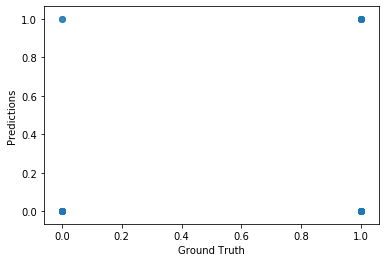

In [98]:
#plt.scatter(y_test, RFpredictions, alpha = 0.5)
#plt.xlabel('Ground Truth')
#plt.ylabel('Predictions')
#plt.show();

In [100]:
from collections import Counter
Counter(RFpredictions)


Counter({0: 175, 1: 13})